https://umich.instructure.com/courses/825993/files/folder/2%20-%20Stats%20and%20Programming%20Review?preview=44628369

# Load Libraries

In [27]:
# Load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import os


# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Set directories

# MAC
# data_dir = '/Users/nick/Desktop/School/Winter 2026/SI 313/si313_w26/data/'

# PC
data_dir = 'F:/School/College/WN 2026/SI 313/SI313-WN26-personal/data'
os.chdir(data_dir)

---

# Load the Data

In [28]:
# Load the Dawtry et al. (2015) Study 1a data
df = pd.read_csv('correlation-assignment_Dawtry Sutton and Sibley 2015 Study 1a.csv')

# Explore the dataframe
print(f"Shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:\n{df.head()}")

Shape: (305, 37)

Column names:
['PS', 'PD_15', 'PD_30', 'PD_45', 'PD_60', 'PD_75', 'PD_90', 'PD_105', 'PD_120', 'PD_135', 'PD_150', 'PD_150plus', 'fairness', 'satisfaction', 'SC_15', 'SC_30', 'SC_45', 'SC_60', 'SC_75', 'SC_90', 'SC_105', 'SC_120', 'SC_135', 'SC_150', 'SC_150plus', 'redist1', 'redist2', 'redist3', 'redist4', 'Household_Income', 'Political_Preference', 'age', 'gender', 'Population_Inequality_Gini_Index', 'Population_Mean_Income', 'Social_Circle_Inequality_Gini_Index', 'Social_Circle_Mean_Income']

First few rows:
    PS  PD_15  PD_30  PD_45  PD_60  PD_75  PD_90  PD_105  PD_120  PD_135  \
0  233     27     48     21      0      0      0       0       0       0   
1  157     39      0      0      0      0      0       0       0       0   
2  275      0      0     50      0      0     50       0       0       0   
3  111      9     14     17     17     17      8       7       5       2   
4   52     68     32      0      0      0      0       0       0       0   

   PD_15

---

# Explore the Data

In [29]:
# Look at data types and missing values
print(f"Data Types")
print(f"{"="*50}")
print(df.info())

# Get basic stats for all numeric variables
print(f"\n\n\n\n\nBasic Stats")
print(f"{"="*50}")
print(df.describe())

# Check specific variables we'll use
print(f"\n\n\n\n\nRelevant Variables")
print(f"{"="*50}")
relevant_vars = ['fairness', 'satisfaction', 'redist1', 'redist2', 'redist3', 'redist4', 'Household_Income', 'Social_Circle_Mean_Income', 'Population_Mean_Income', 'Social_Circle_Inequality_Gini_Index', 'Population_Inequality_Gini_Index', 'Political_Preference']

print(df[relevant_vars].describe())

Data Types
<class 'pandas.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PS                                   305 non-null    int64  
 1   PD_15                                305 non-null    int64  
 2   PD_30                                305 non-null    int64  
 3   PD_45                                305 non-null    int64  
 4   PD_60                                305 non-null    int64  
 5   PD_75                                305 non-null    int64  
 6   PD_90                                305 non-null    int64  
 7   PD_105                               305 non-null    int64  
 8   PD_120                               305 non-null    int64  
 9   PD_135                               305 non-null    int64  
 10  PD_150                               305 non-null    int64  
 11  PD_150plus                      

---

# Create the fairness_and_satisfaction Variable

In [30]:
# Compute mean of fairness and satisfaction
df['fairness_and_satisfaction'] = df[['fairness', 'satisfaction']].mean(axis=1)

# Verify it worked
print(f"New variable created: {df['fairness_and_satisfaction'].describe()}")
print(f"\nMissing values: {df['fairness_and_satisfaction'].isna().sum()}")
# Check a few cases manually
print(df[['fairness', 'satisfaction', 'fairness_and_satisfaction']].head(10))

New variable created: count    305.00
mean       3.54
std        2.02
min        1.00
25%        2.00
50%        3.00
75%        5.00
max        9.00
Name: fairness_and_satisfaction, dtype: float64

Missing values: 0
   fairness  satisfaction  fairness_and_satisfaction
0         1             1                        1.0
1         5             2                        3.5
2         5             5                        5.0
3         7             7                        7.0
4         4             5                        4.5
5         1             4                        2.5
6         3             3                        3.0
7         5             4                        4.5
8         5             3                        4.0
9         4             5                        4.5


---

# Reverse Code Opposition Items

In [31]:
# Reverse code redist2 and redist4
# Formula: 7 - original value (for 1-6 scale)
df['redist2_recode'] = 7 - df['redist2']
df['redist4_recode'] = 7 - df['redist4']

# Verify it worked
print("Original redist2 values:")
print(f"{"="*50}")
print(df['redist2'].value_counts().sort_index())

print("\n\n\nRecoded redist2 values:")
print(f"{"="*50}")
print(df['redist2_recode'].value_counts().sort_index())

# Check a few cases
print("\n\n\nSample of recoding:")
print(f"{"="*50}")
print(df[['redist2', 'redist2_recode', 'redist4', 'redist2_recode']].head(10))

Original redist2 values:
redist2
1    78
2    97
3    77
4    31
5    15
6     7
Name: count, dtype: int64



Recoded redist2 values:
redist2_recode
1     7
2    15
3    31
4    77
5    97
6    78
Name: count, dtype: int64



Sample of recoding:
   redist2  redist2_recode  redist4  redist2_recode
0        3               4        1               4
1        2               5        4               5
2        4               3        5               3
3        3               4        4               4
4        5               2        5               2
5        5               2        6               2
6        2               5        5               5
7        3               4        4               4
8        4               3        5               3
9        4               3        5               3


---

# Create support_for_redistribution Variable

In [32]:
# Compute mean of all redistribution items
df['support_for_redistribution'] = df[['redist1', 'redist2_recode', 'redist3', 'redist4_recode']].mean(axis=1)

# Verify it worked
print(f"New variable created:\n{"="*50}\n{df['support_for_redistribution'].describe()}")
print(f"\n\n\nMissing values:\n{"="*50}\n{df['support_for_redistribution'].isna().sum()}")

# Check internal consistency (Cronbach's alpha - optional)
redist_items = df[['redist1', 'redist2_recode', 'redist3', 'redist4_recode']]
print(redist_items.corr())

New variable created:
count    305.00
mean       3.91
std        1.15
min        1.00
25%        3.25
50%        4.00
75%        4.75
max        6.00
Name: support_for_redistribution, dtype: float64



Missing values:
0
                redist1  redist2_recode  redist3  redist4_recode
redist1            1.00            0.36     0.75            0.51
redist2_recode     0.36            1.00     0.44            0.45
redist3            0.75            0.44     1.00            0.51
redist4_recode     0.51            0.45     0.51            1.00


---

# Calculate Descriptive Statistics

In [35]:
# List of key variables
key_vars = ['Household_Income', 'Social_Circle_Mean_Income', 'Population_Mean_Income', 'Social_Circle_Inequality_Gini_Index', 'Population_Inequality_Gini_Index', 'fairness_and_satisfaction', 'support_for_redistribution', 'Political_Preference']
# debug
# print(df.columns)

# Calculate descriptive statistics
descriptives = df[key_vars].describe().loc[['mean', 'std']].T
descriptives.columns = ['M', 'SD']
descriptives = descriptives. round(2)

print("****Descriptive Statistics for Key Variables****")
print("="*50)
print (descriptives)

# Also get sample sizes
print(f"\n\n\n****Sample Size per variable****")
print("="*50)
print(df[key_vars].count())

****Descriptive Statistics for Key Variables****
                                            M        SD
Social_Circle_Mean_Income            54294.00  25295.52
Population_Mean_Income               58604.85  17230.52
Social_Circle_Inequality_Gini_Index     26.35      9.97
Population_Inequality_Gini_Index        35.51      7.48
fairness_and_satisfaction                3.54      2.02
support_for_redistribution               3.91      1.15



****Sample Size per variable****
Household_Income                       305
Social_Circle_Mean_Income              305
Population_Mean_Income                 305
Social_Circle_Inequality_Gini_Index    305
Population_Inequality_Gini_Index       305
fairness_and_satisfaction              305
support_for_redistribution             305
Political_Preference                   305
dtype: int64


---

# Run Correlation Analysis

In [41]:
# first check that au the variables are the right type
print(df[key_vars].dtypes)

# they weren't when I did this, so fix that
df[key_vars] = df[key_vars].apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
correlation_matrix = df[key_vars].corr(method='pearson')

r_values = correlation_matrix
print(r_values)

Household_Income                       float64
Social_Circle_Mean_Income                int64
Population_Mean_Income                   int64
Social_Circle_Inequality_Gini_Index    float64
Population_Inequality_Gini_Index       float64
fairness_and_satisfaction              float64
support_for_redistribution             float64
Political_Preference                   float64
dtype: object
                                     Household_Income  \
Household_Income                                 1.00   
Social_Circle_Mean_Income                        0.48   
Population_Mean_Income                           0.19   
Social_Circle_Inequality_Gini_Index             -0.12   
Population_Inequality_Gini_Index                -0.07   
fairness_and_satisfaction                        0.18   
support_for_redistribution                      -0.21   
Political_Preference                             0.15   

                                     Social_Circle_Mean_Income  \
Household_Income              

---

# Calculate P-Values

In [42]:
# Function to calculate p-values for all pairs
def calculate_pvalues(df, vars):
    """Calculate p-values for correlations between variables"""
    n_vars = len(vars)
    p_matrix = pd.DataFrame(np.zeros((n_vars, n_vars)),
                            columns=vars, index=vars)

    for i in range(n_vars):
        for j in range(n_vars):
            if i != j:
                # Remove NaN values for this pair
                var1_data = df[vars[i]].dropna()
                var2_data = df[vars[j]].dropna()
                # Find common indices
                common_idx = var1_data.index.intersection(var2_data.index)
                if len(common_idx) > 2:
                    _, p = pearsonr(df.loc[common_idx, vars[i]],
                                    df.loc[common_idx, vars[j]])
                    p_matrix.iloc[i, j] = p
                else:
                    p_matrix.iloc[i, j] = 0

    return p_matrix

# Calculate p-values
p_values = calculate_pvalues(df, key_vars)
print("\nP-values for Correlations")
print("-"*50)
print(p_values.round(3))


P-values for Correlations
--------------------------------------------------
                                     Household_Income  \
Household_Income                             0.00e+00   
Social_Circle_Mean_Income                    0.00e+00   
Population_Mean_Income                       1.00e-03   
Social_Circle_Inequality_Gini_Index          3.20e-02   
Population_Inequality_Gini_Index             2.05e-01   
fairness_and_satisfaction                    1.00e-03   
support_for_redistribution                   0.00e+00   
Political_Preference                         8.00e-03   

                                     Social_Circle_Mean_Income  \
Household_Income                                          0.00   
Social_Circle_Mean_Income                                 0.00   
Population_Mean_Income                                    0.00   
Social_Circle_Inequality_Gini_Index                       0.07   
Population_Inequality_Gini_Index                          0.01   
fairness_and

---

# Create APA-Style Correlation Matrix

In [43]:
def export_apa_correlation(r_df, p_df):
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(r_df, dtype=bool))

    # Initialize the formatted DataFrame
    apa_df = r_df.copy().astype(str)

    for i in range(len(r_df.index)):
        for j in range(len(r_df.columns)):
            # Hide the upper triangle and diagonal
            if mask[i, j]:
                apa_df.iloc[i, j] = ""
                continue

            r_val = r_df.iloc[i, j]
            p_val = p_df.iloc[i, j]

            # Add stars
            stars = ""
            if p_val < .001: stars = "***"
            elif p_val < .01: stars = "**"
            elif p_val < .05: stars = "*"

            # Format to 2 or 3 decimal places (APA usually uses 2 or 3)
            # This version keeps 3 for precision
            formatted_r = f"{r_val:.3f}".replace("0.", ".")  # Remove leading zero for APA style
            apa_df.iloc[i, j] = f"{formatted_r}{stars}"

    # Rename columns to 1, 2, 3... to follow APA table headers
    apa_df.columns = [f"{i+1}" for i in range(len(apa_df.columns))]
    # Add the variable names as the first column
    apa_df.insert(0, "Variable", r_df.index)
    # Add a column for the index numbers
    apa_df.insert(0, "#", range(1, len(apa_df) + 1))

    return apa_df

apa_table = export_apa_correlation(r_values, p_values)
apa_table

,#,Variable,1,2,3,4,5,6,7,8
Household_Income,1,Household_Income,,,,,,,,
Social_Circle_Mean_Income,2,Social_Circle_Mean_Income,.475***,,,,,,,
Population_Mean_Income,3,Population_Mean_Income,.187**,.342***,,,,,,
Social_Circle_Inequality_Gini_Index,4,Social_Circle_Inequality_Gini_Index,-.124*,-.105,-.094,,,,,
Population_Inequality_Gini_Index,5,Population_Inequality_Gini_Index,-.073,-.148**,-.045,.205***,,,,
fairness_and_satisfaction,6,fairness_and_satisfaction,.183**,.240***,.172**,-.075,-.157**,,,
support_for_redistribution,7,support_for_redistribution,-.213***,-.252***,-.177**,.058,.149**,-.700***,,
Political_Preference,8,Political_Preference,.152**,.147*,-.011,-.054,-.140*,.421***,-.570***,


---

# Export Your Table

Table saved to correlation_table.csv

Formatted for Reporting:
|                                     |   # | Variable                            | 1        | 2        | 3       | 4       | 5       | 6        | 7        | 8   |
|:------------------------------------|----:|:------------------------------------|:---------|:---------|:--------|:--------|:--------|:---------|:---------|:----|
| Household_Income                    |   1 | Household_Income                    |          |          |         |         |         |          |          |     |
| Social_Circle_Mean_Income           |   2 | Social_Circle_Mean_Income           | .475***  |          |         |         |         |          |          |     |
| Population_Mean_Income              |   3 | Population_Mean_Income              | .187**   | .342***  |         |         |         |          |          |     |
| Social_Circle_Inequality_Gini_Index |   4 | Social_Circle_Inequality_Gini_Index | -.124*   | -.105    | -.094   |  

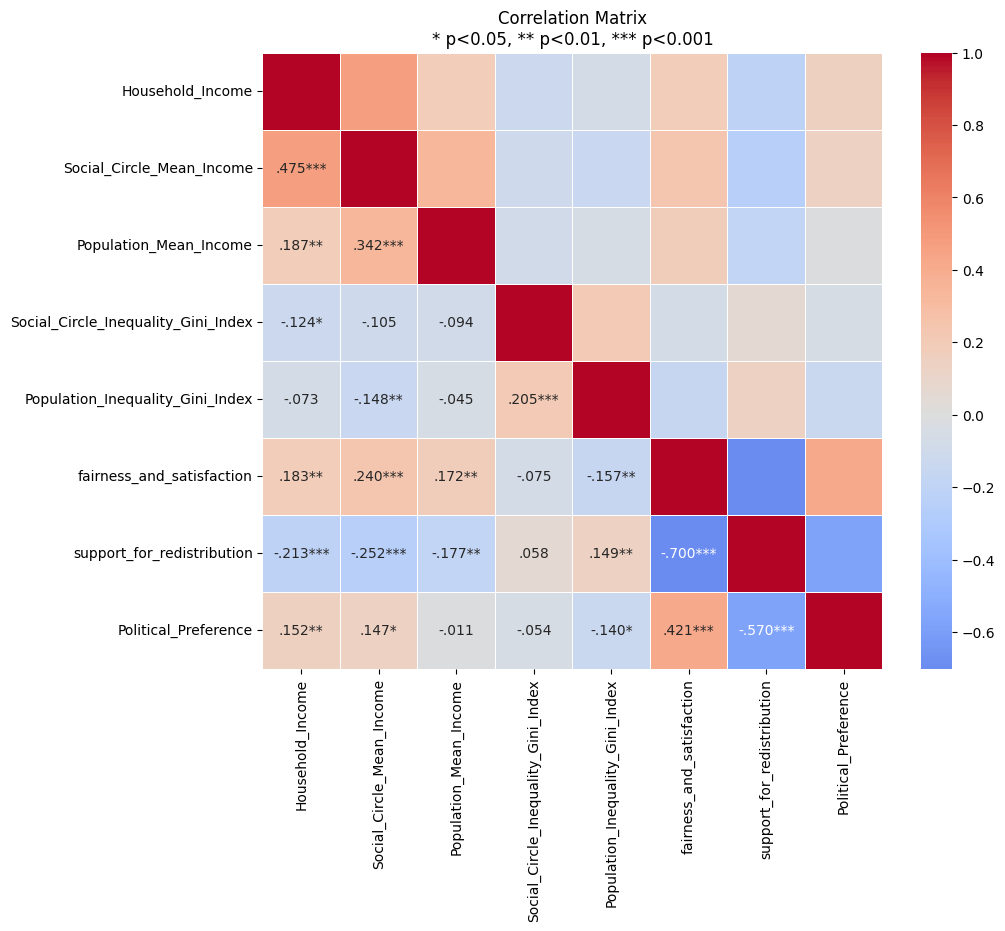

In [45]:
# Save to CSV for easy import into your write–up
apa_table.to_csv('correlation_table.csv')
print("Table saved to correlation_table.csv")

# Or create a nicely formatted version for viewing
print("\nFormatted for Reporting:")
print(apa_table.to_markdown())

report_df = apa_table.drop(columns=["#", "Variable"])

# You can also create a visualization
plt.figure(figsize=(10, 8))
# We use the numeric r_results for the colors but the report_df (strings) for the annotations
sns.heatmap(r_values,
            annot=report_df,
            fmt="",
            cmap='coolwarm',
            center=0,
            linewidths=.5)

plt.title("Correlation Matrix\n* p<0.05, ** p<0.01, *** p<0.001")
plt.show()